# Classification

This exercise sheet covers the following concepts.
- Classification Models
- Comparison of Models

## Libraries and Data

Your task in this exercise is pretty straight forward: apply different classification algorithms to a data set, evaluate the results, and determine the best algorithm. You can find everything you need in ```sklearn```. 

We use data about dominant types of trees in forests in this exercise. The data is available as part of ```sklearn``` (requires version 0.20) for [Python](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype). 

In [1]:
%matplotlib inline
from sklearn.datasets import fetch_covtype
dataset = fetch_covtype()
import requests
covtype_info = requests.get("http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info").text
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plt.rcParams["figure.dpi"] = 150

# dfcolumns = ["Elevation",
#             "Aspect",
#             "Slope",
#             "Horizontal_Distance_To_Hydrology",
#             "Vertical_Distance_To_Hydrology",
#             "Horizontal_Distance_To_Roadways",
#             "Hillshade_9am",
#             "Hillshade_Noon",
#             "Hillshade_3pm",
#             "Horizontal_Distance_To_Fire_Points",
#             "Wilderness_Area",
#             "Soil_Type",
#             "Cover_Type"]
# dftarget = "Cover_Type"
print(covtype_info)

The Forest CoverType dataset


1.	Title of Database:

	Forest Covertype data


2.	Sources:

	(a) Original owners of database:
		Remote Sensing and GIS Program
		Department of Forest Sciences
		College of Natural Resources
		Colorado State University
		Fort Collins, CO  80523
		(contact Jock A. Blackard, jblackard 'at' fs.fed.us
		      or Dr. Denis J. Dean, denis.dean 'at' utdallas.edu)

	NOTE:	Reuse of this database is unlimited with retention of 
		copyright notice for Jock A. Blackard and Colorado 
		State University.

	(b) Donors of database:
		Jock A. Blackard (jblackard 'at' fs.fed.us)
		GIS Coordinator
		USFS - Forest Inventory & Analysis
		Rocky Mountain Research Station
		507 25th Street
		Ogden, UT 84401

		Dr. Denis J. Dean (denis.dean 'at' utdallas.edu)
		Professor
		Program in Geography and Geospatial Sciences
		School of Economic, Political and Policy Sciences
		800 West Campbell Rd
		Richardson, TX  75080-3021 
		
		Dr. Charles W. Anderson (anderson 'at' cs.colostate.edu

<Figure size 1152x648 with 0 Axes>

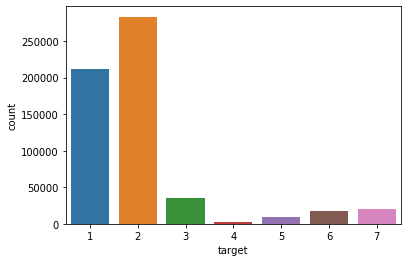

In [2]:
dataset.data.shape
df = pd.DataFrame(dataset.data)
df["target"] = dataset.target
sns.countplot(df["target"])

## Training and test data

Before you can start building classifiers, you need to separate the data into training and test data. Because the data is quite large, please use 5% of the data for training, and 95% of the data for testing. Because you are selecting such a small subset, it could easily happen that not all classes are represented the same way in the training and in the test data. Use _stratified sampling_ to avoid this. 

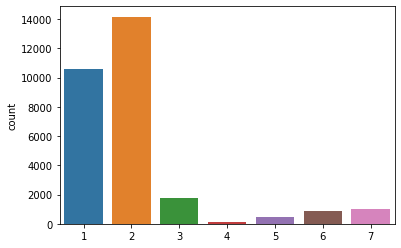

In [3]:
from sklearn.model_selection import train_test_split
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
dataset_train, dataset_test, target_train, target_test = train_test_split(dataset.data, dataset.target, test_size=0.95, stratify=dataset.target)
df_train = pd.DataFrame(dataset_train)
# df_train['target'] = target_train

df_test = pd.DataFrame(dataset_test)
# df_test['target'] = target_test

sns.countplot(target_train)

## Train, Test, Evaluate

Now that training and test data are available, you can try out the classifiers from the lecture. You will notice that some classifiers may require a long amount of time for training and may, therefore, not be suitable for the analysis of this data set. 

Try to find a classifier that works well with the data. On this data, this means two things:
- Training and prediction in an acceptable amount of time. Use "less than 10 minutes" as definition for acceptable on this exercise sheet.
- Good prediction performance as measured with MCC, recall, precision, and F-Measure. 

The different classifiers have different _tuning parameters_, also known as _hyper parameters_, e.g., the depth of a tree, or the number of trees used by a random forest. Try to find good parameters to improve the results. 

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df_train_norm=ss.fit_transform(df_train)
print(df_train_norm.mean(), df_train_norm.std())
df_test_norm=ss.transform(df_test)
from sklearn.neighbors import KNeighborsClassifier
print("yes")
knn_classifier = KNeighborsClassifier(2)
knn_classifier.fit(df_train_norm, target_train)
pred_knn = knn_classifier.predict(df_test)

-1.929567192157855e-18 0.9906974722292539
yes


In [ ]:
# pred_knn = knn_classifier.predict(df_test_norm)
from sklearn.metrics import matthews_corrcoef, recall_score, precision_score, f1_score

knn_mcc = matthews_corrcoef(target_test, pred_knn)
knn_recall = recall_score(target_test, pred_knn, average='micro')
knn_precision = precision_score(target_test, pred_knn, average='micro')
knn_f1 = f1_score(target_test, pred_knn, average='micro')

print(knn_mcc, knn_recall, knn_precision, knn_f1)

In [ ]:

knn_k = []
knn_mcc_s = []
knn_recall_s = []
knn_precision_s = []
knn_f1_s = []
knn_classifier_s = []

for i in range(1, 4):
    knn_classifier = KNeighborsClassifier(i)
    print("Training for k = "+str(i))
    knn_classifier.fit(df_train, target_train)
    print("Testing for k = "+str(i))
    pred_knn = knn_classifier.predict(df_test)

    knn_mcc = matthews_corrcoef(target_test, pred_knn)
    knn_recall = recall_score(target_test, pred_knn, average='micro')
    knn_precision = precision_score(target_test, pred_knn, average='micro')
    knn_f1 = f1_score(target_test, pred_knn, average='micro')

    knn_mcc_s.append(knn_mcc)
    knn_recall_s.append(knn_recall)
    knn_precision_s.append(knn_precision)
    knn_f1_s.append(knn_f1)

    knn_classifier_s.append(knn_classifier)

    knn_k.append(i)




plt.plot(knn_k, knn_mcc_s)
plt.plot(knn_k, knn_recall_s)
plt.plot(knn_k, knn_precision_s)
plt.plot(knn_k, knn_f1_s)
plt.show()


## Bonus Task (will not be discussed during the exercise)

Other than trying out, you can also automatically tune your hyper parameters, if you have a training, a validation, and a test set. This is also supported by ```sklearn``` [directly](https://scikit-learn.org/stable/modules/grid_search.html). You may use this to try out how such automated tuning affets your results. But beware: this can easily consume large amounts of computational capacity!